<a href="https://colab.research.google.com/github/felixlys/KalmanFilterApplication/blob/main/KF_Heat%20Observation_GoodVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Jawabanb)Kestabilan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'A_Asimilasi Data.xlsx'
columns_to_read = 'A:J'
rows_to_read = '1:10'

# Gunakan pemisah tanda tab
data = pd.read_excel(file_path, usecols=columns_to_read, nrows=10)

baris1=np.array([0.5, 0.25, 0, 0, 0, 0, 0, 0, 0, 0])
Abelum=data.values
A=np.vstack((baris1,Abelum))
print(A)
eigenvalues, eigenvectors = np.linalg.eig(A)
for eigenvalue in eigenvalues:
    print("Eigenvalue:", eigenvalue)
##Nilai Eigen |lambda|<1, sehingga terbukti sistem Stabil

[[0.5  0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.5  0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.5  0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.5  0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.5  0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.5  0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.5 ]]
Eigenvalue: 0.9797464868072491
Eigenvalue: 0.9206267664155909
Eigenvalue: 0.8274303669726435
Eigenvalue: 0.7077075065009436
Eigenvalue: 0.5711574191366443
Eigenvalue: 0.4288425808633575
Eigenvalue: 0.02025351319275118
Eigenvalue: 0.07937323358440943
Eigenvalue: 0.17256963302735753
Eigenvalue: 0.2922924934990568


In [ ]:
import numpy as np

# Definisi matriks A, B, dan U
baris1 = np.array([0.5, 0.25, 0., 0., 0., 0., 0., 0., 0., 0.])
Abelum = data.values  # Pastikan data.values sesuai dengan kebutuhan
A = np.vstack((baris1, Abelum))
B = 0.25 * np.identity(10)[:, 0]  # Mengubah B menjadi matriks kolom (10, 1)
u = 100

# Inisialisasi matriks x_iterasi dengan nol
x_iterasi = np.zeros((10, 41))

# Inisialisasi X awal
x_iterasi[:, 0] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Iterasi dari t = 1 hingga t = 40
for t in range(1, 41):
    # Menghitung Input
    Input = np.dot(B, u)

    # Menghitung X_iterasi
    x_iterasi[:, t] = np.dot(A, x_iterasi[:, t-1]) + Input

print(x_iterasi)
# Hasil akhir matriks x_iterasi


[[0.00000000e+00 2.50000000e+01 3.75000000e+01 4.53125000e+01
  5.07812500e+01 5.48828125e+01 5.81054688e+01 6.07238770e+01
  6.29058838e+01 6.47605896e+01 6.63623810e+01 6.77639484e+01
  6.90037966e+01 7.01108038e+01 7.11071104e+01 7.20100132e+01
  7.28332481e+01 7.35878801e+01 7.42829359e+01 7.49258625e+01
  7.55228658e+01 7.60791643e+01 7.65991824e+01 7.70866995e+01
  7.75449655e+01 7.79767930e+01 7.83846302e+01 7.87706188e+01
  7.91366424e+01 7.94843645e+01 7.98152610e+01 8.01306460e+01
  8.04316942e+01 8.07194593e+01 8.09948892e+01 8.12588396e+01
  8.15120849e+01 8.17553277e+01 8.19892074e+01 8.22143067e+01
  8.24311585e+01]
 [0.00000000e+00 0.00000000e+00 6.25000000e+00 1.25000000e+01
  1.79687500e+01 2.26562500e+01 2.66845703e+01 3.01757812e+01
  3.32305908e+01 3.59283447e+01 3.83310318e+01 4.04872894e+01
  4.24356222e+01 4.42068338e+01 4.58258320e+01 4.73129660e+01
  4.86850242e+01 4.99559833e+01 5.11375782e+01 5.22397380e+01
  5.32709255e+01 5.42384012e+01 5.51484330e+01 5.600

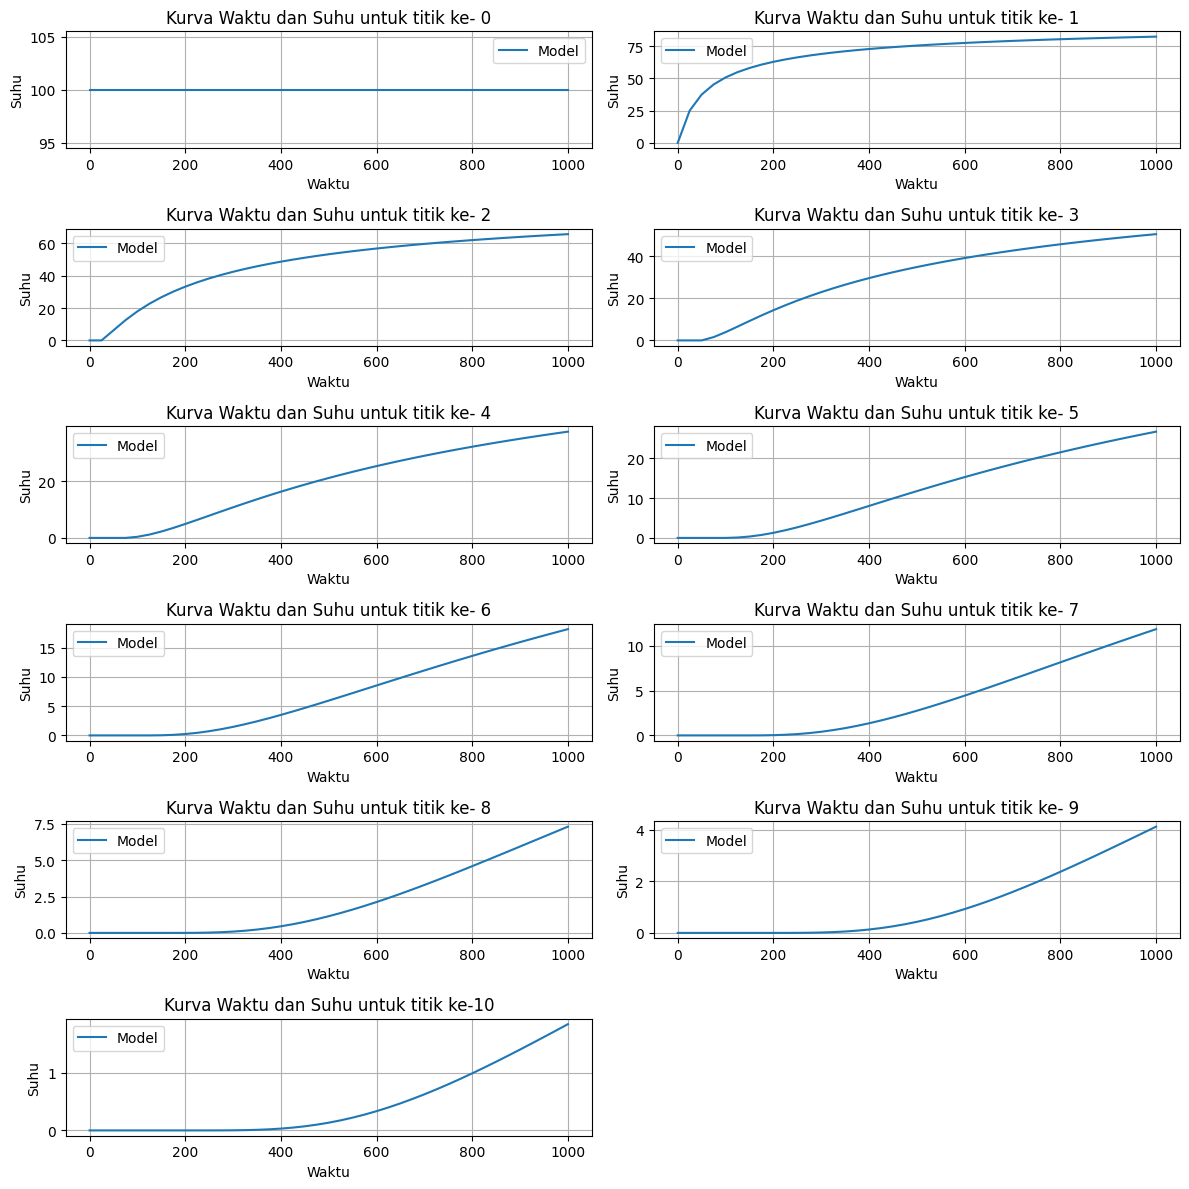

In [ ]:
L = 100  # Panjang domain
T = 1000  # Waktu total
dt = 25  # Delta t
maxk = int(T / dt)
initial_row = np.full((1, len(x_iterasi[0])), 100)
x_lengkap = np.vstack((initial_row, x_iterasi))
time = np.linspace(0, T, maxk + 1)
# Menambahkan subplot ke-11
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
mse_values = []
for i in range(10):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot Q(10i+10, t) pada subplot
    ax.plot(time,x_lengkap[i,:], label=f'Model')



    ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke- {(i)}')
    ax.set_xlabel('Waktu')
    ax.set_ylabel('Suhu')
    ax.grid(True)
    ax.legend()

# Menambahkan subplot ke-11 untuk kurva tambahan
ax = axes[5, 0]
ax.plot(time, x_lengkap[10, :], label=f'Model')
ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke-10')
ax.set_xlabel('Waktu')
ax.set_ylabel('Suhu')
ax.grid(True)
ax.legend()

if 11 % 2 != 0:
    fig.delaxes(axes[5, 1])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Definisi matriks A, B, dan U
baris1 = np.array([0.5, 0.25, 0., 0., 0., 0., 0., 0., 0., 0.])
Abelum = data.values  # Pastikan data.values sesuai dengan kebutuhan
A = np.vstack((baris1, Abelum))
B = 0.25 * np.identity(10)[:, 0]  # Mengubah B menjadi matriks kolom (10, 1)
u = 100

# Inisialisasi matriks x_iterasi dengan nol
x_ganggusist = np.zeros((10, 41))

# Inisialisasi X awal
x_ganggusist[:, 0] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
G=np.ones((1, 10))

# Iterasi dari t = 1 hingga t = 40
for t in range(1, 41):
    # Menghitung Input
    Input = np.dot(B, u)
    Q=1e-2
    w=np.random.normal(0,Q)
    Gangguansist=np.dot(G,w)


    # Menghitung X_iterasi
    x_ganggusist[:, t] = np.dot(A, x_ganggusist[:, t-1]) + Input +Gangguansist
print(x_ganggusist)

[[ 0.00000000e+00  2.49974512e+01  3.75072239e+01  4.53054504e+01
   5.07634360e+01  5.48814954e+01  5.81125483e+01  6.07493931e+01
   6.29138465e+01  6.47673456e+01  6.63803202e+01  6.77788527e+01
   6.90142775e+01  7.01224869e+01  7.11191826e+01  7.20245257e+01
   7.28496879e+01  7.35998765e+01  7.43090552e+01  7.49381365e+01
   7.55439114e+01  7.61012884e+01  7.66141551e+01  7.71012228e+01
   7.75602688e+01  7.79928308e+01  7.84170101e+01  7.87950921e+01
   7.91401124e+01  7.94861701e+01  7.98221547e+01  8.01336873e+01
   8.04443169e+01  8.07347740e+01  8.10198903e+01  8.12677159e+01
   8.15288059e+01  8.17735362e+01  8.20175957e+01  8.22539533e+01
   8.24632170e+01]
 [ 0.00000000e+00 -2.54883599e-03  6.25658665e+00  1.24944378e+01
   1.79498775e+01  2.26500232e+01  2.66888336e+01  3.02013395e+01
   3.32446173e+01  3.59399377e+01  3.83533337e+01  4.05092613e+01
   4.24538356e+01  4.42257031e+01  4.58452900e+01  4.73351382e+01
   4.87099470e+01  4.99774317e+01  5.11726299e+01  5.2264

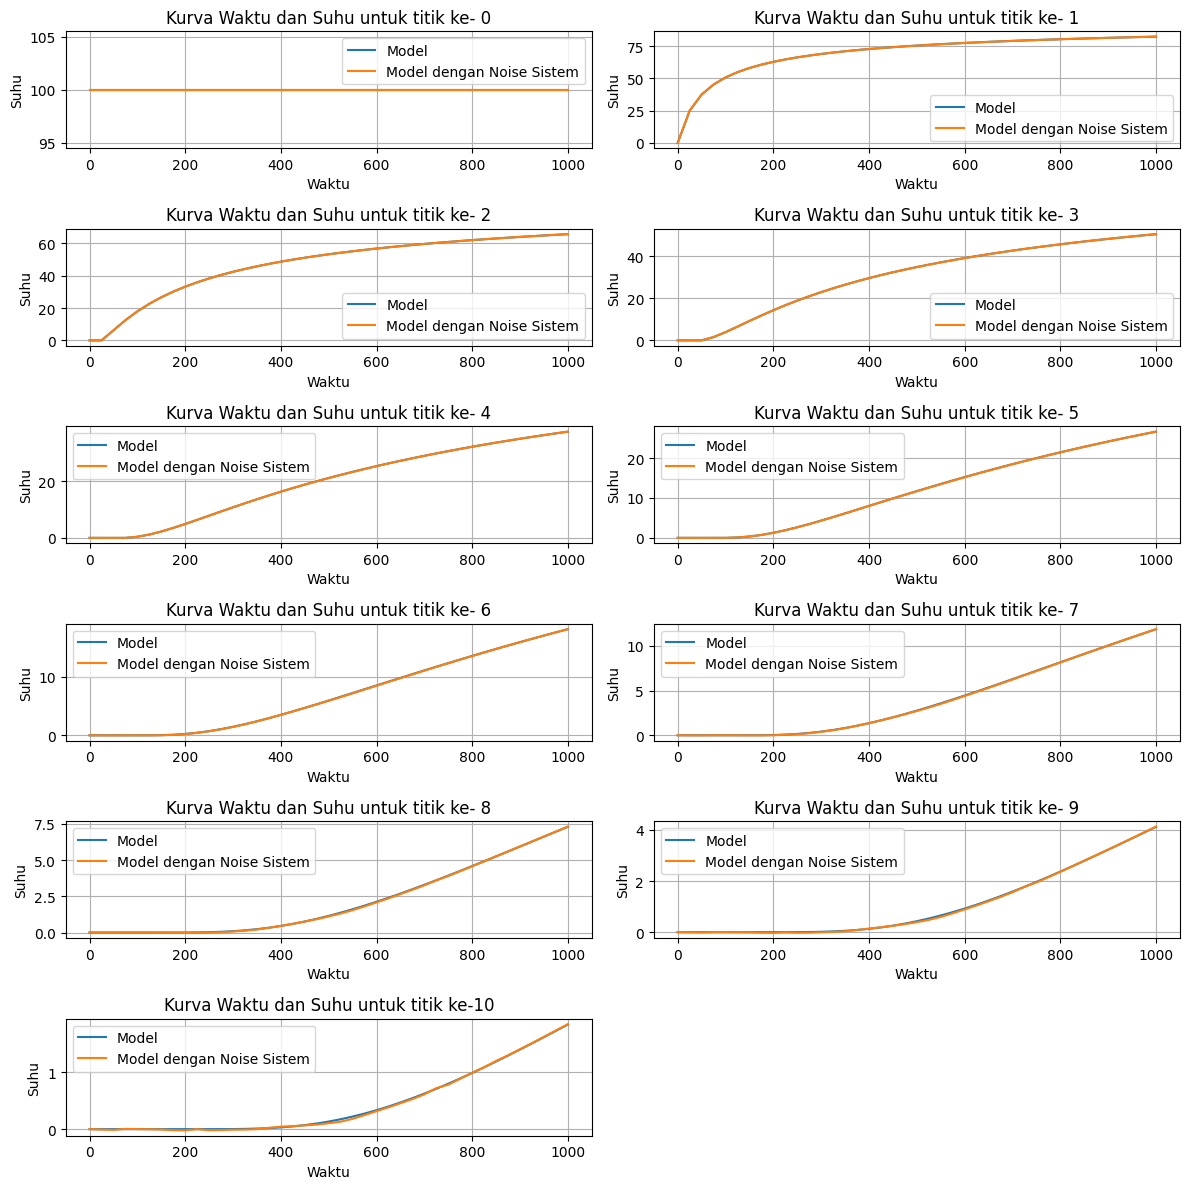

In [ ]:
L = 100  # Panjang domain
T = 1000  # Waktu total
dt = 25  # Delta t
maxk = int(T / dt)
initial_row = np.full((1, len(x_ganggusist[0])), 100)
x_lengkap1 = np.vstack((initial_row, x_ganggusist))
time = np.linspace(0, T, maxk + 1)
# Menambahkan subplot ke-11
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
mse_values = []
for i in range(10):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot Q(10i+10, t) pada subplot
    ax.plot(time,x_lengkap[i,:], label=f'Model')
    ax.plot(time,x_lengkap1[i,:], label=f'Model dengan Noise Sistem')
    ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke- {(i)}')
    ax.set_xlabel('Waktu')
    ax.set_ylabel('Suhu')
    ax.grid(True)
    ax.legend()

# Menambahkan subplot ke-11 untuk kurva tambahan
ax = axes[5, 0]
ax.plot(time, x_lengkap[10, :], label=f'Model')
ax.plot(time, x_lengkap1[10, :], label=f'Model dengan Noise Sistem')
ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke-10')
ax.set_xlabel('Waktu')
ax.set_ylabel('Suhu')
ax.grid(True)
ax.legend()

if 11 % 2 != 0:
    fig.delaxes(axes[5, 1])

plt.tight_layout()
plt.show()

In [ ]:
Z=np.vstack([x_lengkap1[2,:],x_lengkap1[5,:],x_lengkap1[7,:],x_lengkap1[8,:]])
R= np.array([[1e-2, 0, 0, 0],
              [0, 1e-2, 0, 0],
              [0, 0, 1e-2, 0],
              [0, 0, 0, 1e-2]])
for t in range(1, 4):
    # Menghitung Input
    random_vector = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=R)
    # Menghitung X_iterasi
    Z[:, t]=+random_vector


In [ ]:
print(Z)

[[ 0.00000000e+00  1.50470404e-01  1.87212656e-01  1.89096383e-01
   1.79800192e+01  2.26707222e+01  2.66938707e+01  3.02104693e+01
   3.32559277e+01  3.59371307e+01  3.83416133e+01  4.05069465e+01
   4.24590355e+01  4.42289579e+01  4.58419142e+01  4.73160329e+01
   4.87019763e+01  4.99914346e+01  5.11736087e+01  5.22720395e+01
   5.32926430e+01  5.42620306e+01  5.51749877e+01  5.60137205e+01
   5.68229541e+01  5.75987765e+01  5.83275984e+01  5.90073932e+01
   5.96673681e+01  6.02958658e+01  6.08999892e+01  6.14728648e+01
   6.20270421e+01  6.25382213e+01  6.30485604e+01  6.35317159e+01
   6.40087472e+01  6.44627258e+01  6.48936706e+01  6.53108788e+01
   6.57192500e+01]
 [ 0.00000000e+00 -5.42592199e-02 -1.07974872e-01  1.62974516e-02
   1.27630385e-02  1.14653556e-01  3.54223983e-01  7.77058936e-01
   1.30209773e+00  1.93589746e+00  2.67820594e+00  3.49593611e+00
   4.35930753e+00  5.25397433e+00  6.16766248e+00  7.08803340e+00
   8.04091984e+00  8.99754541e+00  9.93237499e+00  1.0855

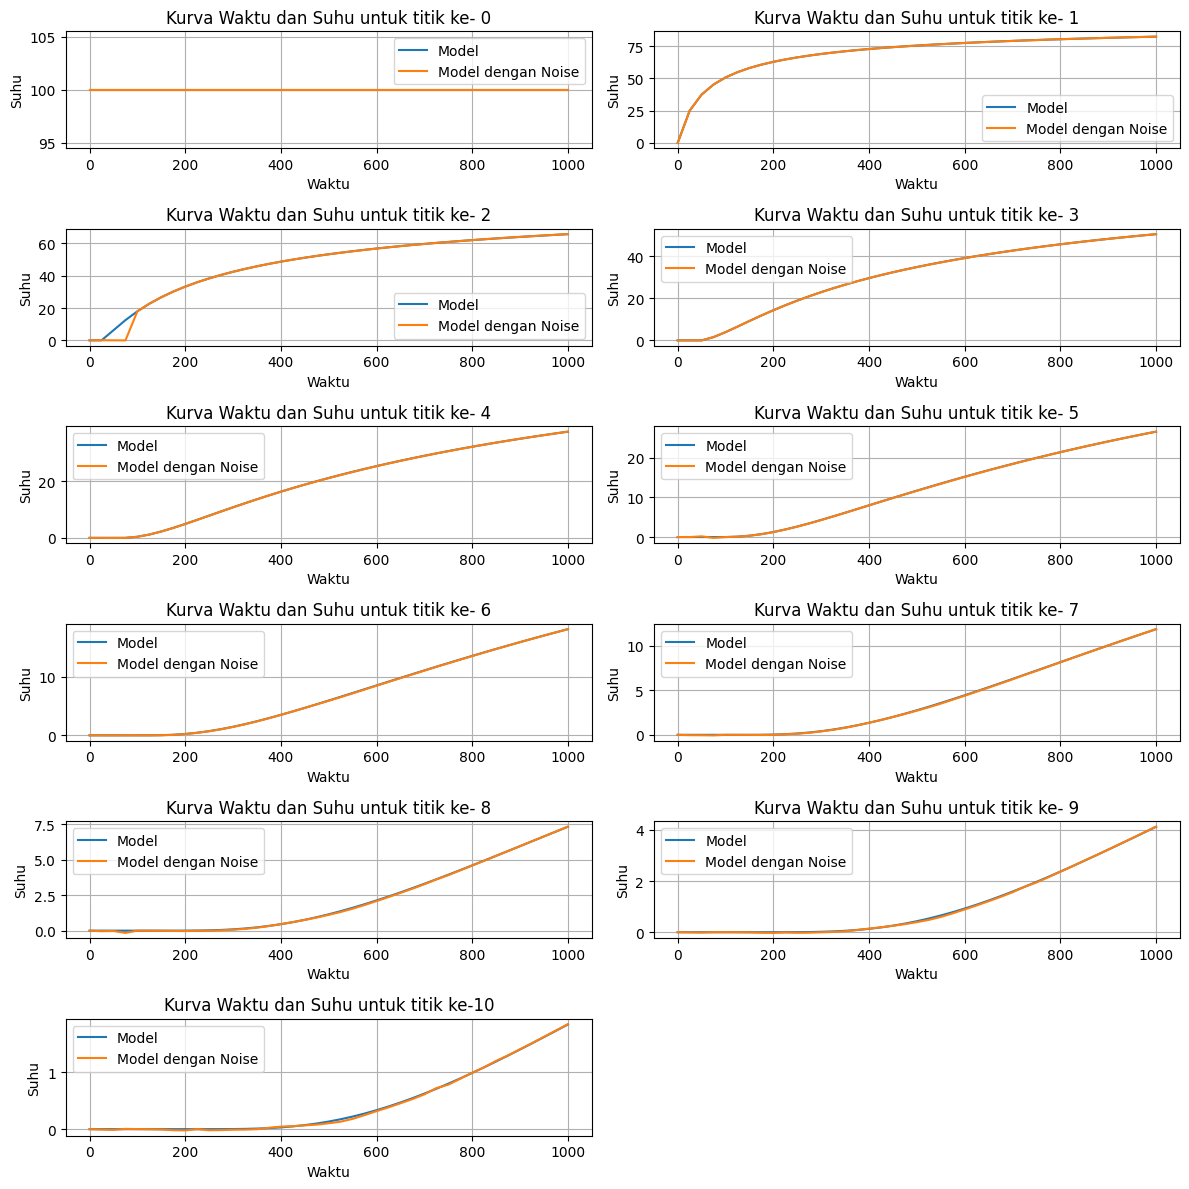

In [ ]:
L = 100  # Panjang domain
T = 1000  # Waktu total
dt = 25  # Delta t
maxk = int(T / dt)
initial_row = np.full((1, len(x_ganggusist[0])), 100)
x_lengkap2 = np.vstack((initial_row,x_ganggusist))
x_lengkap2[2,:]=Z[0,:]
x_lengkap2[5,:]=Z[1,:]
x_lengkap2[7,:]=Z[2,:]
x_lengkap2[8,:]=Z[3,:]
time = np.linspace(0, T, maxk + 1)
# Menambahkan subplot ke-11
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
mse_values = []
for i in range(10):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot Q(10i+10, t) pada subplot
    ax.plot(time,x_lengkap[i,:], label=f'Model')
    ax.plot(time,x_lengkap2[i,:], label=f'Model dengan Noise')
    ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke- {(i)}')
    ax.set_xlabel('Waktu')
    ax.set_ylabel('Suhu')
    ax.grid(True)
    ax.legend()

# Menambahkan subplot ke-11 untuk kurva tambahan
ax = axes[5, 0]
ax.plot(time, x_lengkap[10, :], label=f'Model')
ax.plot(time, x_lengkap2[10, :], label=f'Model dengan Noise')
ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke-10')
ax.set_xlabel('Waktu')
ax.set_ylabel('Suhu')
ax.grid(True)
ax.legend()

if 11 % 2 != 0:
    fig.delaxes(axes[5, 1])

plt.tight_layout()
plt.show()

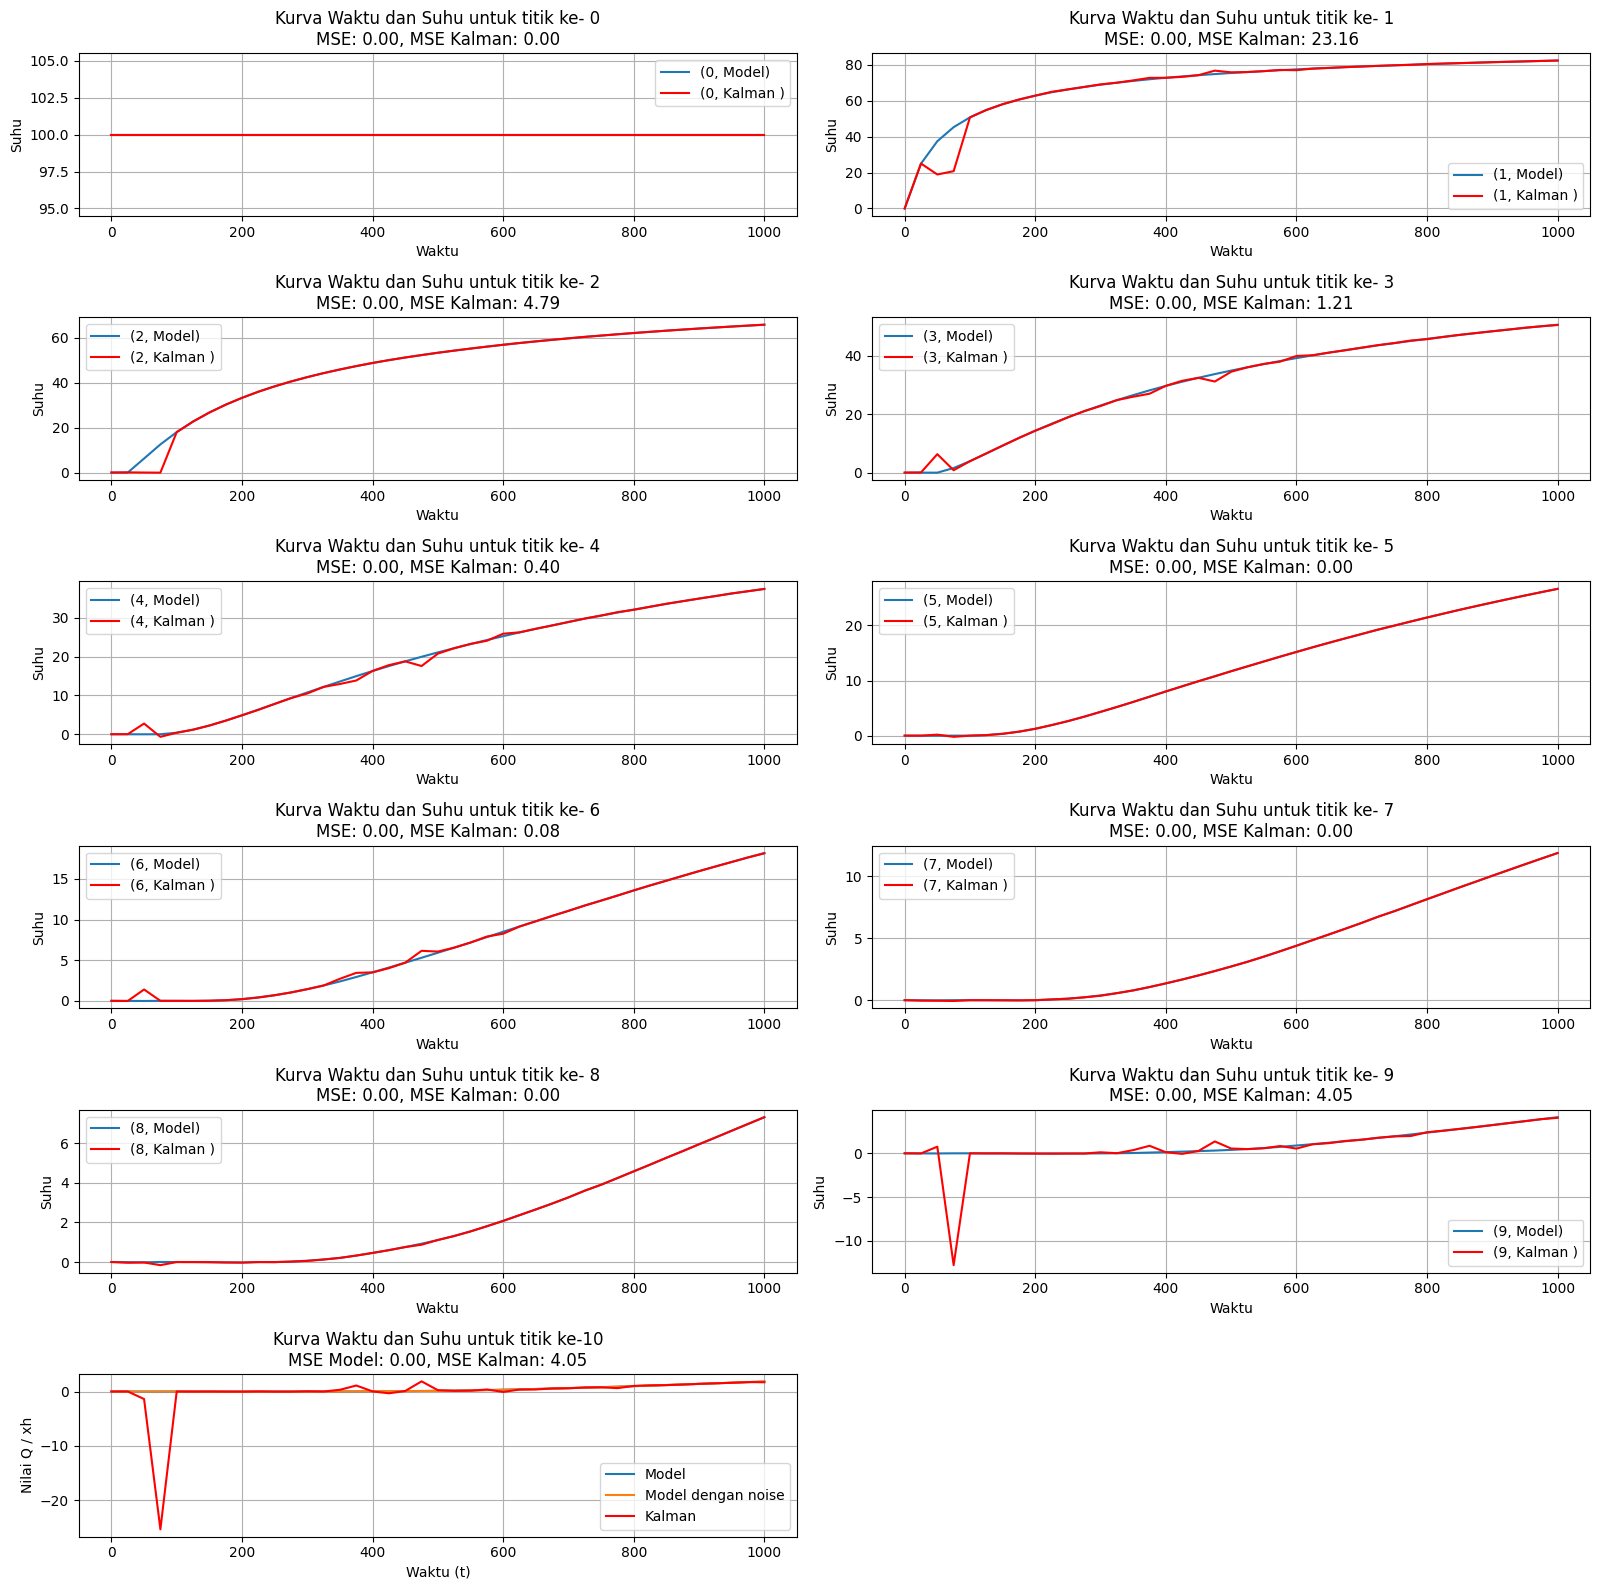

MSE untuk subplot ke-1: 0.00
MSE untuk subplot ke-2: 0.00
MSE untuk subplot ke-3: 0.00
MSE untuk subplot ke-4: 23.16
MSE untuk subplot ke-5: 0.00
MSE untuk subplot ke-6: 4.79
MSE untuk subplot ke-7: 0.00
MSE untuk subplot ke-8: 1.21
MSE untuk subplot ke-9: 0.00
MSE untuk subplot ke-10: 0.40
MSE untuk subplot ke-11: 0.00
MSE untuk subplot ke-12: 0.00
MSE untuk subplot ke-13: 0.00
MSE untuk subplot ke-14: 0.08
MSE untuk subplot ke-15: 0.00
MSE untuk subplot ke-16: 0.00
MSE untuk subplot ke-17: 0.00
MSE untuk subplot ke-18: 0.00
MSE untuk subplot ke-19: 0.00
MSE untuk subplot ke-20: 4.05


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0, 1025, 25)
G=np.ones((10,1))

xhmin_kalman=np.zeros((10, len(t)))
xh_kalman=np.zeros((10, len(t)))
file_path = 'A_Asimilasi Data.xlsx'
columns_to_read = 'A:J'
rows_to_read = '1:10'

# Gunakan pemisah tanda tab
data = pd.read_excel(file_path, usecols=columns_to_read, nrows=10)

baris1=np.array([0.5, 0.25, 0, 0, 0, 0, 0, 0, 0, 0])
Abelum=data.values
A=np.vstack((baris1,Abelum))
B = np.array([0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0])
u = 100
file_path1 = 'H_Asimilasi Data.xlsx'
columns_to_read1 = 'A:J'
rows_to_read1 = '1:4'
G=np.ones((10,1))
# Gunakan pemisah tanda tab
data1 = pd.read_excel(file_path1, usecols=columns_to_read1, nrows=4)
baris1H=np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
Hbelum=data1.values
H=np.vstack((baris1H,Hbelum))
P=(1e-2)*np.eye(10)

G=np.ones((1, 10))
import numpy as np

# Definisi matriks A, B, dan U
baris1 = np.array([0.5, 0.25, 0., 0., 0., 0., 0., 0., 0., 0.])
Abelum = data.values  # Pastikan data.values sesuai dengan kebutuhan
A = np.vstack((baris1, Abelum))
B = 0.25 * np.identity(10)[:, 0]  # Mengubah B menjadi matriks kolom (10, 1)
u = 100

# Inisialisasi matriks x_iterasi dengan nol
x_ganggusist = np.zeros((10, 41))

# Inisialisasi X awal
x_ganggusist[:, 0] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
G=np.ones((1, 10))

# Iterasi dari t = 1 hingga t = 40
for t in range(1, 41):
    # Menghitung Input
    Input = np.dot(B, u)
    Q=1e+4
    w=np.random.normal(0,Q)
    Gangguansist=np.dot(G,w)


    # Menghitung X_iterasi
    x_ganggusist[:, t] = np.dot(A, x_ganggusist[:, t-1]) + Input +Gangguansist

Z=np.vstack([x_lengkap1[2,:],x_lengkap1[5,:],x_lengkap1[7,:],x_lengkap1[8,:]])
R= np.array([[1e-2, 0, 0, 0],
              [0, 1e-2, 0, 0],
              [0, 0, 1e-2, 0],
              [0, 0, 0, 1e-2]])
for t in range(1, 4):
    random_vector = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=R)
    Z[:, t]=+random_vector
x_ganggusist = np.zeros((10, 41))
x_ganggusist[:, 0] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

z = np.zeros((maxk + 1, 4))
z[:, 0] = x_lengkap2[2,:]  # Q(20, t)
z[:, 1] = x_lengkap2[5, :]  # Q(50, t)
z[:, 2] = x_lengkap2[7, :]  # Q(70, t)
z[:, 3] = x_lengkap2[8, :]  # Q(80, t)
mse_values = []  # Inisialisasi untuk menyimpan nilai MSE

for k in range(40):
    Pmin =np.dot(A, np.dot(P, A.T)) + Q * np.dot(G, G.T)
    xhmin_kalman[:, k + 1] = np.dot(A, xhmin_kalman[:, k]) + np.dot(B, u)
    K = np.dot(np.dot(Pmin, H.T), np.linalg.inv(np.dot(np.dot(H, Pmin), H.T) + 10))
    xh_kalman[:, k + 1] = xhmin_kalman[:, k + 1] + np.dot(K, z[k + 1] - np.dot(H, xhmin_kalman[:, k + 1]))
    P = np.dot(np.identity(10) - np.dot(K, H), Pmin)
initial_row = np.full((1, len(x_lengkap2[0])), 100)
xh_kalman=np.vstack((initial_row, xh_kalman))
# Menambahkan subplot ke-11
fig, axes = plt.subplots(6, 2, figsize=(16, 16))

for i in range(10):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot Q(10i+10, t) pada subplot

    # Plot (i, xh[i, :]) pada subplot
    ax.plot(time, x_lengkap1[i, :], label=f'({i}, Model)')
    ax.plot(time, xh_kalman[i, :], label=f'({i}, Kalman )',color='red')

    # Menghitung MSE
    mse = np.mean((x_lengkap[i, :] - x_lengkap1[i, :])**2)
    mse_kalman = np.mean((x_lengkap[i, :]- xh_kalman[i, :])**2)
    mse_values.append(mse)
    mse_values.append(mse_kalman)

    ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke- {(i)}\nMSE: {mse:.2f}, MSE Kalman: {mse_kalman:.2f}')
    ax.set_xlabel('Waktu')
    ax.set_ylabel('Suhu')
    ax.grid(True)
    ax.legend()

ax = axes[5, 0]
ax.plot(time, x_lengkap[10,:], label=f'Model')
ax.plot(time, x_lengkap1[10, :], label=f'Model dengan noise')
ax.plot(time, xh_kalman[10, :], label=f'Kalman',color='red')
ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke-10\nMSE Model: {mse_values[-2]:.2f}, MSE Kalman: {mse_values[-1]:.2f}')
ax.set_xlabel('Waktu (t)')
ax.set_ylabel('Nilai Q / xh')
ax.grid(True)
ax.legend()

if 11 % 2 != 0:
    fig.delaxes(axes[5, 1])

plt.tight_layout()
plt.show()

for i, mse in enumerate(mse_values):
    print(f'MSE untuk subplot ke-{i + 1}: {mse:.2f}')

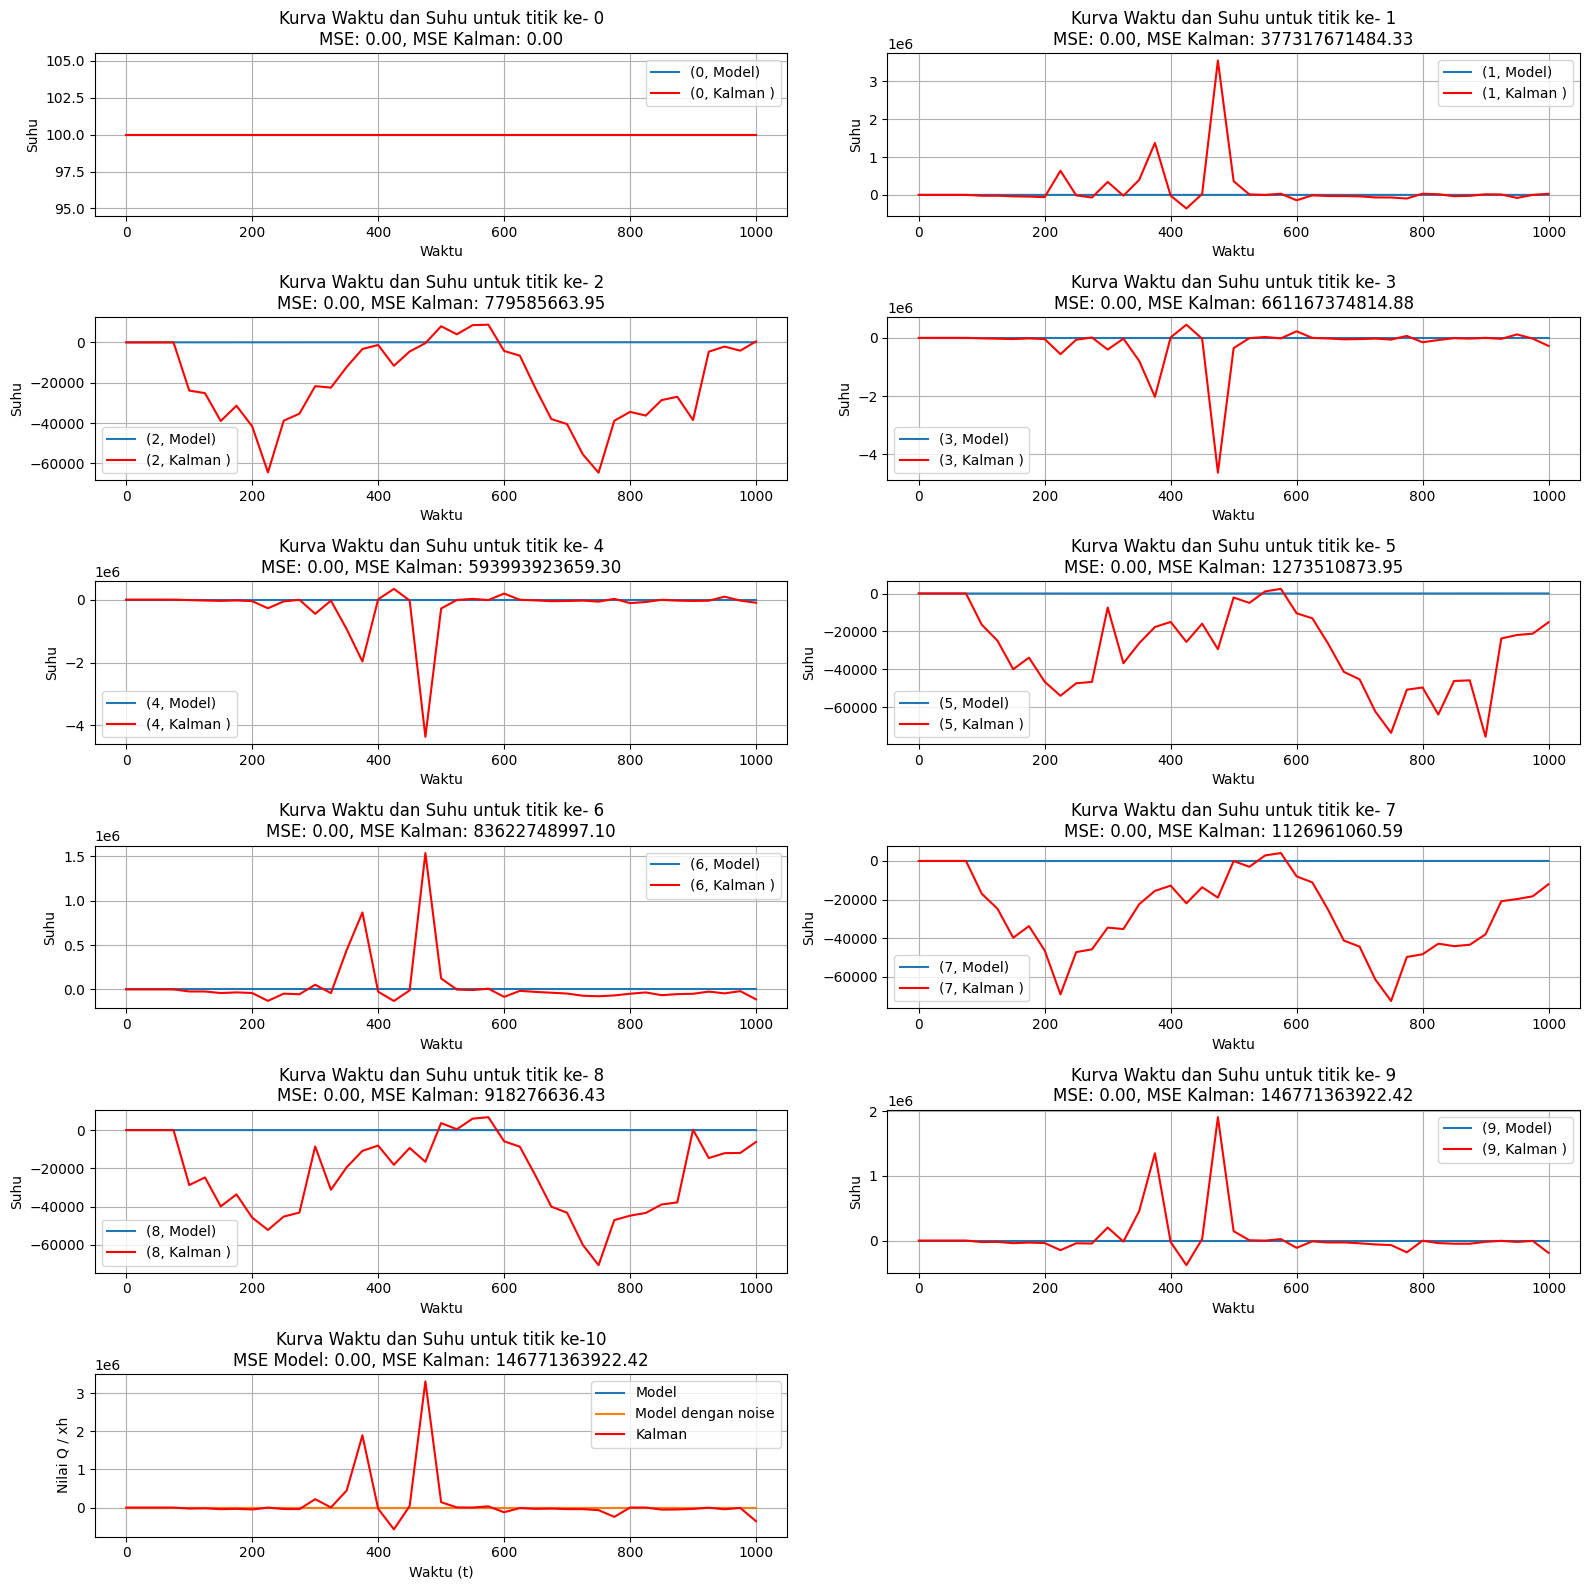

MSE untuk subplot ke-1: 0.00
MSE untuk subplot ke-2: 0.00
MSE untuk subplot ke-3: 0.00
MSE untuk subplot ke-4: 377317671484.33
MSE untuk subplot ke-5: 0.00
MSE untuk subplot ke-6: 779585663.95
MSE untuk subplot ke-7: 0.00
MSE untuk subplot ke-8: 661167374814.88
MSE untuk subplot ke-9: 0.00
MSE untuk subplot ke-10: 593993923659.30
MSE untuk subplot ke-11: 0.00
MSE untuk subplot ke-12: 1273510873.95
MSE untuk subplot ke-13: 0.00
MSE untuk subplot ke-14: 83622748997.10
MSE untuk subplot ke-15: 0.00
MSE untuk subplot ke-16: 1126961060.59
MSE untuk subplot ke-17: 0.00
MSE untuk subplot ke-18: 918276636.43
MSE untuk subplot ke-19: 0.00
MSE untuk subplot ke-20: 146771363922.42


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0, 1025, 25)
G=np.ones((10,1))


xhmin_kalman=np.zeros((10, len(t)))
xh_kalman=np.zeros((10, len(t)))
file_path = 'A_Asimilasi Data.xlsx'
columns_to_read = 'A:J'
rows_to_read = '1:10'

data = pd.read_excel(file_path, usecols=columns_to_read, nrows=10)

baris1=np.array([0.5, 0.25, 0, 0, 0, 0, 0, 0, 0, 0])
Abelum=data.values
A=np.vstack((baris1,Abelum))
B = np.array([0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0])
u = 100
file_path = 'H_Asimilasi Data.xlsx'
columns_to_read = 'A:J'
rows_to_read = '1:4'
G=np.ones((1,10))
P=(1e-2)*np.eye(10)
x_iterasi = np.zeros((10, 41))
x_iterasi[:, 0] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
for t in range(1, 41):
    Input = np.dot(B, u)
    x_iterasi[:, t] = np.dot(A, x_iterasi[:, t-1]) + Input
initial_row = np.full((1, len(x_iterasi[0])), 100)
x_lengkap = np.vstack((initial_row, x_iterasi))
for t in range(1, 41):
    # Menghitung Input
    Input = np.dot(B, u)
    Q=1e+4
    w=np.random.normal(0,Q)
    Gangguansist=np.dot(G,w)
    x_ganggusist[:, t] = np.dot(A, x_ganggusist[:, t-1]) + Input +Gangguansist
initial_row = np.full((1, len(x_ganggusist[0])), 100)
x_lengkap1 = np.vstack((initial_row, x_ganggusist))
Z=np.vstack([x_lengkap1[2,:],x_lengkap1[5,:],x_lengkap1[7,:],x_lengkap1[8,:]])
R= np.array([[1e-2, 0, 0, 0],
              [0, 1e-2, 0, 0],
              [0, 0, 1e-2, 0],
              [0, 0, 0, 1e-2]])
for t in range(1, 4):
    # Menghitung Input
    random_vector = np.random.multivariate_normal(mean=[0, 0, 0, 0], cov=R)
    # Menghitung X_iterasi
    Z[:, t]=+random_vector

x_lengkap2 = np.vstack((initial_row,x_ganggusist))
x_lengkap2[2,:]=Z[0,:]
x_lengkap2[5,:]=Z[1,:]
x_lengkap2[7,:]=Z[2,:]
x_lengkap2[8,:]=Z[3,:]
z = np.zeros((maxk + 1, 4))
z[:, 0] = x_lengkap2[2,:]  # Q(20, t)
z[:, 1] = x_lengkap2[5, :]  # Q(50, t)
z[:, 2] = x_lengkap2[7, :]  # Q(70, t)
z[:, 3] = x_lengkap2[8, :]  # Q(80, t)
mse_values = []  # Inisialisasi untuk menyimpan nilai MSE

for k in range(40):
    Pmin =np.dot(A, np.dot(P, A.T)) + Q * np.dot(G, G.T)
    xhmin_kalman[:, k + 1] = np.dot(A, xhmin_kalman[:, k]) + np.dot(B, u)
    K = np.dot(np.dot(Pmin, H.T), np.linalg.inv(np.dot(np.dot(H, Pmin), H.T) + 10))
    xh_kalman[:, k + 1] = xhmin_kalman[:, k + 1] + np.dot(K, z[k + 1] - np.dot(H, xhmin_kalman[:, k + 1]))
    P = np.dot(np.identity(10) - np.dot(K, H), Pmin)
initial_row = np.full((1, len(x_lengkap2[0])), 100)
xh_kalman=np.vstack((initial_row, xh_kalman))
# Menambahkan subplot ke-11
fig, axes = plt.subplots(6, 2, figsize=(16, 16))

for i in range(10):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot Q(10i+10, t) pada subplot

    # Plot (i, xh[i, :]) pada subplot
    ax.plot(time, x_lengkap[i, :], label=f'({i}, Model)')
    ax.plot(time, xh_kalman[i, :], label=f'({i}, Kalman )',color='red')

    # Menghitung MSE
    mse = np.mean((x_lengkap[i, :] - x_lengkap[i, :])**2)
    mse_kalman = np.mean((x_lengkap[i, :]- xh_kalman[i, :])**2)
    mse_values.append(mse)
    mse_values.append(mse_kalman)

    ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke- {(i)}\nMSE: {mse:.2f}, MSE Kalman: {mse_kalman:.2f}')
    ax.set_xlabel('Waktu')
    ax.set_ylabel('Suhu')
    ax.grid(True)
    ax.legend()

ax = axes[5, 0]
ax.plot(time, x_lengkap[10,:], label=f'Model')
ax.plot(time, x_lengkap[10, :], label=f'Model dengan noise')
ax.plot(time, xh_kalman[10, :], label=f'Kalman',color='red')
ax.set_title(f'Kurva Waktu dan Suhu untuk titik ke-10\nMSE Model: {mse_values[-2]:.2f}, MSE Kalman: {mse_values[-1]:.2f}')
ax.set_xlabel('Waktu (t)')
ax.set_ylabel('Nilai Q / xh')
ax.grid(True)
ax.legend()

if 11 % 2 != 0:
    fig.delaxes(axes[5, 1])

plt.tight_layout()
plt.show()

for i, mse in enumerate(mse_values):
    print(f'MSE untuk subplot ke-{i + 1}: {mse:.2f}')